In [1]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import os
import tensorflow as tf
import zipfile
from tensorflow import keras
from tensorflow.keras import layers
import nibabel as nib
import glob
from sklearn.utils import shuffle
import sys
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, EarlyStopping

In [2]:
from keras.utils import np_utils
from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.losses import binary_crossentropy
from keras.optimizers import Adadelta, SGD
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
from keras.models import Model
import cv2
import os
import numpy as np
import keras
import h5py
import numpy as np
from keras import regularizers
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score

from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
# from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model
import keras

In [3]:
seed = 7
np.random.seed(seed)

In [ ]:
cd /

/


In [4]:
x_train = np.load("/content/drive/MyDrive/thesis2/x_train_minmax_normalized.npy")
y_train = np.load("/content/drive/MyDrive/thesis2/y_training.npy")

In [5]:
x_train.shape,y_train.shape

((6000, 64, 64, 33), (6000,))

In [ ]:
# x_mean = np.mean(x_train)
# x_std = np.std(x_train)
# x_mean,x_std
# # (1553.0166624964165, 3575.5203140146095)

(0.22945192119659386, 0.10349581814834698)

In [6]:
np.max(x_train),np.min(x_train)

(1.0, 0.0)

In [7]:
m , mi = 28822.50390625, -6477.419921875

In [ ]:
# x_train = (x_train- x_mean)/x_std

In [8]:
x_test = np.load("/content/drive/MyDrive/thesis2/x_test.npy")
y_test = np.load("/content/drive/MyDrive/thesis2/y_test.npy")

In [9]:
x_test.shape,y_test.shape

((1500, 64, 64, 33), (1500,))

In [10]:
x_test = (x_test - mi) / (m - mi)

In [11]:
x_val = np.load("/content/drive/MyDrive/thesis2/x_validation2.npy")
y_val = np.load("/content/drive/MyDrive/thesis2/y_validation2.npy")

In [12]:
y_val.shape

(900,)

In [13]:
x_val.shape,y_val.shape

((900, 64, 64, 33), (900,))

In [14]:
x_val = (x_val - mi) / (m - mi)

learning rate/batch size/dropout

In [ ]:
# def m_naive():
    
#     filter_size = 32
#     input_layer = Input((64, 64, 33, 1)) # 1 is just dummy dimension good for nothing 
    
#     conv_layer1 = Conv3D(filters=filter_size, kernel_size=(2, 2, 2), activation='relu')(input_layer)
#     pooling_layer1 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer1)

        
#     #conv_layer2 = Conv3D(filters=16, kernel_size=(2, 2, 2), activation='relu')(pooling_layer1)
#     #pooling_layer2 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer2)

#     #conv_layer3 = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu')(pooling_layer1)
#     #pooling_layer3 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer3)

#     conv_layer4 = Conv3D(filters=filter_size, kernel_size=(2, 2, 2), activation='relu')(pooling_layer1)
#     pooling_layer4 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer4)

#     conv_layer5 = Conv3D(filters=filter_size, kernel_size=(2, 2, 2), activation='relu')(pooling_layer4)
#     pooling_layer5 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer5)
    
#     pooling_layer9 = BatchNormalization()(pooling_layer5)
#     flatten_layer = Flatten()(pooling_layer9)

#     dense_layer1 = Dense(units=1028, activation='relu')(flatten_layer)
#     dense_layer1 = Dropout(0.4)(dense_layer1)
    
    
#     dense_layer2 = Dense(units=1028, activation='relu')(dense_layer1)
#     dense_layer2 = Dropout(0.4)(dense_layer2)
    
#     dense_layer3 = Dense(units=512, activation='relu')(dense_layer2)
#     dense_layer3 = Dropout(0.4)(dense_layer3)

#     dense_layer4 = Dense(units=256, activation='relu')(dense_layer2)
#     dense_layer4 = Dropout(0.4)(dense_layer3)

#     output_layer = Dense(units=1, activation='sigmoid')(dense_layer4)

#     model = Model(inputs=input_layer, outputs=output_layer)

#     model.compile(loss=binary_crossentropy, optimizer=SGD(learning_rate=1e-4, momentum=0.9), metrics=['acc']) # # optimizers.SGD(lr=1e-4, momentum=0.9)
    
#     return model

# model = None
# model = m_naive()
# model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 33, 1)]   0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 63, 63, 32, 32)    288       
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 31, 31, 16, 32)    0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 30, 30, 15, 32)    8224      
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 15, 15, 7, 32)     0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 14, 14, 6, 32)     8224      
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 7, 7, 3, 32)       0   

In [16]:
def m_naive():
    
    filter_size = 32
    input_layer = Input((64, 64, 33, 1)) # 1 is just dummy dimension good for nothing 
    
    conv_layer1 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu')(input_layer)
    pooling_layer1 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer1)

    pooling_layer1 = BatchNormalization()(pooling_layer1)  
    conv_layer2 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu')(pooling_layer1)
    pooling_layer2 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer2)
    pooling_layer2 = BatchNormalization()(pooling_layer2)
    conv_layer3 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu')(pooling_layer1)
    pooling_layer3 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer3)
    pooling_layer3 = BatchNormalization()(pooling_layer3)
    conv_layer4 = Conv3D(filters=128, kernel_size=(3, 3, 3), activation='relu')(pooling_layer3)
    pooling_layer4 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer4)
    pooling_layer4 = BatchNormalization()(pooling_layer4)
    conv_layer5 = Conv3D(filters=256, kernel_size=(3, 3, 3), activation='relu',padding='same')(pooling_layer4)
    pooling_layer5 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer5)
    
    pooling_layer9 = BatchNormalization()(pooling_layer5)
    flatten_layer = Flatten()(pooling_layer9)

    #dense_layer1 = Dense(units=1028, activation='relu')(flatten_layer)
    #dense_layer1 = Dropout(0.4)(dense_layer1)
    
    
    #dense_layer2 = Dense(units=1028, activation='relu')(flatten_layer)
    #dense_layer2 = Dropout(0.4)(dense_layer2)
    
    dense_layer3 = Dense(units=512, activation='relu')(flatten_layer)
    dense_layer3 = Dropout(0.4)(dense_layer3)

    dense_layer4 = Dense(units=256, activation='relu')(dense_layer3)
    dense_layer4 = Dropout(0.4)(dense_layer3)
  
    output_layer = Dense(units=1, activation='sigmoid')(dense_layer4)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(loss='mae', optimizer=SGD(learning_rate=1e-06, momentum=0.99, decay=0.0, nesterov=False), metrics=['acc']) # # optimizers.SGD(lr=1e-4, momentum=0.9)
    
    return model

model = None
model = m_naive()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 33, 1)]   0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 62, 62, 31, 64)    1792      
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 31, 31, 15, 64)    0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 31, 31, 15, 64)    256       
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 29, 29, 13, 64)    110656    
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 14, 14, 6, 64)     0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 6, 64)     256 

In [ ]:
# initial_learning_rate = 0.0001
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
# )
# model.compile(
#     loss="binary_crossentropy",
#     optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
#     metrics=["acc"],
# )

# Define callbacks.
checkpoint_accuracy = keras.callbacks.ModelCheckpoint(
    "best_accuracy.h5", save_best_only=True,monitor = 'val_acc',mode = max
)
checkpoint_validation = keras.callbacks.ModelCheckpoint(
    "best_loss.h5", save_best_only=True,monitor = 'val_loss',mode = min
)
# dlr = ReduceLROnPlateau(monitor="val_acc", factor=0.5, patience=5,
#                             mode='max', verbose=1, cooldown=5, min_lr=1e-8)

# Train the model, doing validation at the end of each epoch
epochs = 50
history = model.fit(
    x = x_train,y = y_train,
    validation_data=(x_val,y_val),
    epochs=epochs,
    shuffle=True,
    verbose=2,
    callbacks=[checkpoint_accuracy,checkpoint_validation],
)

Epoch 1/50
188/188 - 65s - loss: 0.3894 - acc: 0.6377 - val_loss: 0.5015 - val_acc: 0.5000
Epoch 2/50
188/188 - 30s - loss: 0.2116 - acc: 0.8493 - val_loss: 0.5056 - val_acc: 0.5000
Epoch 3/50
188/188 - 30s - loss: 0.1125 - acc: 0.9488 - val_loss: 0.5213 - val_acc: 0.5000
Epoch 4/50
188/188 - 30s - loss: 0.0661 - acc: 0.9823 - val_loss: 0.4815 - val_acc: 0.6600
Epoch 5/50
188/188 - 30s - loss: 0.0446 - acc: 0.9933 - val_loss: 0.3964 - val_acc: 0.6389
Epoch 6/50
188/188 - 30s - loss: 0.0330 - acc: 0.9970 - val_loss: 0.3825 - val_acc: 0.6667
Epoch 7/50
188/188 - 30s - loss: 0.0274 - acc: 0.9980 - val_loss: 0.3773 - val_acc: 0.6611
Epoch 8/50
188/188 - 30s - loss: 0.0228 - acc: 0.9990 - val_loss: 0.3760 - val_acc: 0.6667
Epoch 9/50
188/188 - 30s - loss: 0.0186 - acc: 0.9993 - val_loss: 0.3746 - val_acc: 0.6600
Epoch 10/50
188/188 - 30s - loss: 0.0156 - acc: 0.9993 - val_loss: 0.3755 - val_acc: 0.6667
Epoch 11/50
188/188 - 30s - loss: 0.0137 - acc: 0.9998 - val_loss: 0.3774 - val_acc: 0.66

In [ ]:
64*64 

4096

In [ ]:
# model1.fit(
#     x = special,y = special_label,
#     validation_data=(x_val,y_val),
#     epochs=epochs,
#     shuffle=True,
#     verbose=2,
#     callbacks=[checkpoint_accuracy,checkpoint_validation],
# )

Epoch 1/50
5/5 - 2s - loss: 0.3285 - acc: 0.9000 - val_loss: 2.5975 - val_acc: 0.7000
Epoch 2/50
5/5 - 1s - loss: 9.5738e-14 - acc: 1.0000 - val_loss: 4.0548 - val_acc: 0.7000
Epoch 3/50
5/5 - 1s - loss: 4.4092e-19 - acc: 1.0000 - val_loss: 5.2204 - val_acc: 0.7000
Epoch 4/50
5/5 - 1s - loss: 1.5472e-20 - acc: 1.0000 - val_loss: 6.1715 - val_acc: 0.7000
Epoch 5/50
5/5 - 1s - loss: 2.7705e-22 - acc: 1.0000 - val_loss: 6.9592 - val_acc: 0.7000
Epoch 6/50
5/5 - 1s - loss: 2.3151e-22 - acc: 1.0000 - val_loss: 7.6236 - val_acc: 0.7000
Epoch 7/50
5/5 - 1s - loss: 9.7864e-25 - acc: 1.0000 - val_loss: 8.1946 - val_acc: 0.7000
Epoch 8/50
5/5 - 1s - loss: 2.9227e-23 - acc: 1.0000 - val_loss: 8.6923 - val_acc: 0.7000
Epoch 9/50
5/5 - 1s - loss: 5.3510e-25 - acc: 1.0000 - val_loss: 9.1324 - val_acc: 0.7000
Epoch 10/50
5/5 - 1s - loss: 2.6364e-23 - acc: 1.0000 - val_loss: 9.5263 - val_acc: 0.7000
Epoch 11/50
5/5 - 1s - loss: 1.1196e-27 - acc: 1.0000 - val_loss: 9.8825 - val_acc: 0.7000
Epoch 12/50


In [ ]:
model.save('last_model.h5')

Separate graphs

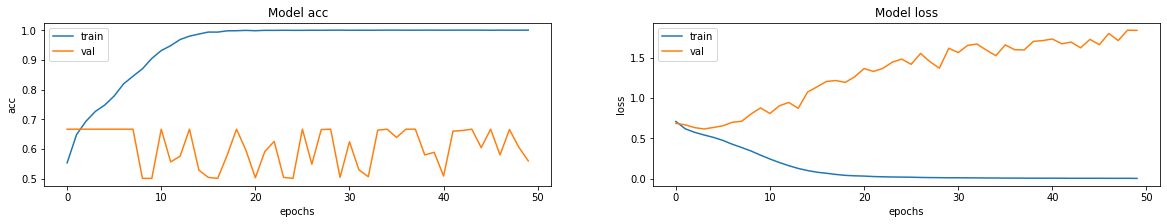

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

    


In [ ]:
y_train[:10]

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

Shuffling the test set

In [ ]:
x_test2, y_test2= shuffle(x_test,y_test,random_state = 4)

In [ ]:
y_test2.shape

(1500,)

In [ ]:
# 3 images each with scz  27
x_test3 = np.load("/content/drive/MyDrive/thesis2/x_test2.npy")
y_test3 = np.load("/content/drive/MyDrive/thesis2/y_test2.npy")

In [ ]:
cd /

/


In [ ]:
# 2 images each
x_test4 = np.load("/content/drive/MyDrive/thesis2/x_test4.npy")
y_test4 = np.load("/content/drive/MyDrive/thesis2/y_test4.npy")

In [ ]:
# 3 images each without image scz 27

x_test5 = np.load("/content/drive/MyDrive/thesis2/x_test5.npy")
y_test5 = np.load("/content/drive/MyDrive/thesis2/y_test5.npy")

In [ ]:
# all images except scz 27

x_test6 = np.load("/content/drive/MyDrive/thesis2/x_test6.npy")
y_test6 = np.load("/content/drive/MyDrive/thesis2/y_test6.npy")

In [ ]:
y_test6.shape

(1350,)

(900,)

In [ ]:
model.evaluate(x = x_test3,y = y_test3)

29/29 [==============================] - 1s 24ms/step - loss: 3748.0520 - acc: 0.8333


[3748.052001953125, 0.8333333134651184]

In [ ]:
model.evaluate(x = x_test6,y = y_test6)

43/43 [==============================] - 1s 24ms/step - loss: 0.0000e+00 - acc: 1.0000


[0.0, 1.0]

In [ ]:
y_test2.shape

(1500,)

Evaluating last model on test set

In [ ]:
model.evaluate(x = x_val,y = y_val)

29/29 [==============================] - 1s 24ms/step - loss: 1.8362 - acc: 0.5600


[1.8361611366271973, 0.5600000023841858]

In [ ]:
y_test6.shape

(1350,)

In [ ]:
np.sum(y_test5==1)

450

In [ ]:
model.evaluate(x = x_test3,y = y_test3)

29/29 [==============================] - 1s 18ms/step - loss: 5852.2446 - acc: 0.8378


[5852.24462890625, 0.8377777934074402]

Evaluating last model on validation set

In [ ]:
model.evaluate(x = x_val,y = y_val)

47/47 [==============================] - 1s 19ms/step - loss: 3.0491 - acc: 0.6900


[3.049051523208618, 0.6899999976158142]

Loading the best accuracy model

In [ ]:
model1 = load_model('best_accuracy.h5')

Evaluating best accuracy model on test set


In [ ]:
model1.evaluate(x = x_test6,y = y_test6)

43/43 [==============================] - 2s 24ms/step - loss: 431.3573 - acc: 0.3333


[431.3572998046875, 0.3333333432674408]

Evaluating best accuracy model on validation  set

In [ ]:
model1.evaluate(x = x_val,y = y_val)

29/29 [==============================] - 1s 24ms/step - loss: 0.6845 - acc: 0.6667


[0.6845026016235352, 0.6666666865348816]

Loading the best loss model

In [ ]:
model2 = load_model('best_loss.h5')

Evaluating best loss model on test set

In [ ]:
model2.evaluate(x = x_test6,y = y_test6)

43/43 [==============================] - 2s 25ms/step - loss: 1633.0262 - acc: 0.6719


[1633.0262451171875, 0.6718518733978271]

Evaluating best loss model on validation set

In [ ]:
model2.evaluate(x = x_val,y = y_val)

29/29 [==============================] - 1s 25ms/step - loss: 0.6156 - acc: 0.6667


[0.6156153082847595, 0.6666666865348816]

Calculating different metrics

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [ ]:
y_test[:4]

array([1, 0, 1, 0])

In [ ]:
yhat_probs = model.predict(x_test, verbose=0)
y_classes = yhat_probs.argmax(axis=-1)


In [ ]:
y_proba = model.predict(x_val)

In [ ]:
y_proba = y_proba[:, 0]

In [ ]:
y_proba

array([9.9655837e-01, 4.1803364e-03, 9.5483847e-02, ..., 3.2115945e-01,
       9.9762732e-01, 2.9092067e-04], dtype=float32)

In [ ]:
y_classes

array([0, 0, 0])

In [ ]:
y_classes = (y_proba > 0.5).astype(np.int)
y_classes


array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
np.sum(y_val ==y_classes)

922

In [ ]:
y_classes

array([0, 0, 0])

In [ ]:
model.evaluate(x_test[:3],  y_test[:3])

1/1 [==============================] - 0s 19ms/step - loss: 7.0844 - acc: 0.3333


[7.084360122680664, 0.3333333432674408]

In [ ]:
y_classes

array([0, 0, 0])

In [ ]:
yhat_probs= np.argmax(yhat_probs, axis=1)

In [ ]:
yhat_probs [:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
special = np.load("/content/drive/MyDrive/thesis2/special.npy")
special_label = np.load("/content/drive/MyDrive/thesis2/special_label.npy")

In [ ]:
special.shape

(150, 64, 64, 33)

In [ ]:
y_prob= model.predict(x_test3, verbose=0)
y_prob = y_prob[:, 0]

y_classes = (y_prob > 0.5).astype(np.int)


# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test3, y_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test3, y_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test3, y_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test3, y_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test3, y_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test3, y_prob)
print('ROC AUC: %f' % auc)
# confusion matrix
print("Confusion matrix:")
matrix = confusion_matrix(y_test3, y_classes,labels=(1,0))
print(matrix)
# disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=None)
# disp.plot() 

Accuracy: 0.833333
Precision: 1.000000
Recall: 0.666667
F1 score: 0.800000
Cohens kappa: 0.666667
ROC AUC: 0.833333
Confusion matrix:
[[300 150]
 [  0 450]]


In [ ]:
y_classes[:10]

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
y_test4[:10]

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
y_classes[:10]

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
y_classes.shape

(600,)

In [ ]:
np.sum(y_classes==1)

450

In [ ]:
np.sum(y_val==1)

1050

In [ ]:
y_classes[:10]

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
sensitivity = matrix[0,0]/(matrix[0,0]+matrix[0,1])
print('Sensitivity : ', sensitivity )

specificity = matrix[1,1]/(matrix[1,0]+matrix[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.6577777777777778
Specificity :  1.0


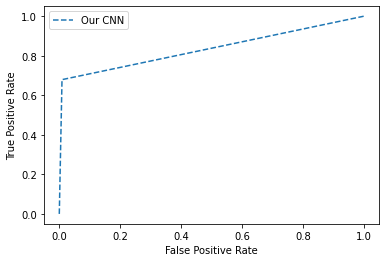

In [ ]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate roc curves
y_prob= model1.predict(x_test3, verbose=0)
y_prob = y_prob[:, 0]


ns_fpr, ns_tpr, _ = roc_curve(y_test3, y_prob)
# lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Our CNN')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_prob= model1.predict(x_test3, verbose=0)

In [ ]:
y_prob = y_prob[:, 0]

y_classes = (y_prob > 0.5).astype(np.int)

In [ ]:
y_classes[:10]

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
y_prob[:10]

array([1., 0., 0., 0., 1., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [ ]:
y_val[:10]

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [ ]:
y_train[:10]

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
cd /

/


In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Orm2tbk5gljhnRrZ56onxRdmIUWvYt-X' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Orm2tbk5gljhnRrZ56onxRdmIUWvYt-X" -O finaltest.zip && rm -rf /tmp/cookies.txt


--2021-05-17 23:55:38--  https://docs.google.com/uc?export=download&confirm=izR9&id=1Orm2tbk5gljhnRrZ56onxRdmIUWvYt-X
Resolving docs.google.com (docs.google.com)... 173.194.79.139, 173.194.79.113, 173.194.79.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.79.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-5s-docs.googleusercontent.com/docs/securesc/pb60cjjjvvv0db43il8v6oc0sfpt158u/4ckpc0tinl79lva7pnt8h6ma8e6vot83/1621295700000/10681116013986523016/02639302157970986819Z/1Orm2tbk5gljhnRrZ56onxRdmIUWvYt-X?e=download [following]
--2021-05-17 23:55:38--  https://doc-0g-5s-docs.googleusercontent.com/docs/securesc/pb60cjjjvvv0db43il8v6oc0sfpt158u/4ckpc0tinl79lva7pnt8h6ma8e6vot83/1621295700000/10681116013986523016/02639302157970986819Z/1Orm2tbk5gljhnRrZ56onxRdmIUWvYt-X?e=download
Resolving doc-0g-5s-docs.googleusercontent.com (doc-0g-5s-docs.googleusercontent.com)... 172.217.218.132, 2a00:1450:4013:c01::84
Connectin

In [ ]:
# from google.colab import files
# files.download('example.txt') 
!unzip /finaltest.zip -d /
print('done')

Archive:  /finaltest.zip
   creating: /scz_test/
  inflating: /scz_test/18.nii.gz     
  inflating: /scz_test/19.nii.gz     
  inflating: /scz_test/20.nii.gz     
  inflating: /scz_test/21.nii.gz     
  inflating: /scz_test/22.nii.gz     
  inflating: /scz_test/23.nii.gz     
  inflating: /scz_test/24.nii.gz     
  inflating: /scz_test/25.nii.gz     
  inflating: /scz_test/26.nii.gz     
  inflating: /scz_test/27.nii.gz     
  inflating: /scz_test/28.nii.gz     
  inflating: /scz_test/29.nii.gz     
  inflating: /scz_test/30.nii.gz     
  inflating: /scz_test/31.nii.gz     
   creating: /normal_test/
  inflating: /normal_test/18.nii.gz  
  inflating: /normal_test/19.nii.gz  
  inflating: /normal_test/20.nii.gz  
  inflating: /normal_test/21.nii.gz  
  inflating: /normal_test/22.nii.gz  
  inflating: /normal_test/23.nii.gz  
  inflating: /normal_test/24.nii.gz  
  inflating: /normal_test/25.nii.gz  
  inflating: /normal_test/26.nii.gz  
done


In [ ]:
normaltest = []
scztest = []

In [ ]:
flag = 0
count = 0
for file in glob.glob('/normal_test/*'):
  count= count+1
  print(file)
  img4d = nib.load(file)
  img3d_list = nib.funcs.four_to_three(img4d)
  for i in img3d_list:
    data = i.get_fdata()
    normaltest.append(data)
    
  #   if (len(scz)==2500):
  #     flag = 1
  #     if(flag == 1):
  #       break
  # if(flag == 1):
  #   break
print("done")
print(count)

/normal_test/19.nii.gz
/normal_test/21.nii.gz
/normal_test/25.nii.gz
/normal_test/23.nii.gz
/normal_test/20.nii.gz
/normal_test/22.nii.gz
/normal_test/24.nii.gz
/normal_test/18.nii.gz
/normal_test/26.nii.gz
done
9


In [ ]:
flag = 0
count = 0
for file in glob.glob('/scz_test/*'):
  count= count+1
  print(file)
  img4d = nib.load(file)
  img3d_list = nib.funcs.four_to_three(img4d)
  for i in img3d_list:
    data = i.get_fdata()
    scztest.append(data)
    
  #   if (len(scz)==2500):
  #     flag = 1
  #     if(flag == 1):
  #       break
  # if(flag == 1):
  #   break
print("done")
print(count)

/scz_test/29.nii.gz
/scz_test/19.nii.gz
/scz_test/21.nii.gz
/scz_test/25.nii.gz
/scz_test/28.nii.gz
/scz_test/23.nii.gz
/scz_test/30.nii.gz
/scz_test/31.nii.gz
/scz_test/20.nii.gz
/scz_test/22.nii.gz
/scz_test/24.nii.gz
/scz_test/18.nii.gz
/scz_test/27.nii.gz
/scz_test/26.nii.gz
done
14


In [ ]:
normaltest_labels = np.array([0 for _ in range(len(normaltest))])
scztest_labels = np.array([1 for _ in range(len(scztest))])


y = np.concatenate((normaltest_labels[:], scztest_labels[:]), axis=0)

In [ ]:
normaltest_array = np.asarray(normaltest)
normaltest_array =(normaltest_array- x_mean)/x_std
scztest_array = np.asarray(scztest)
scztest_array =(scztest_array- x_mean)/x_std


x_test = np.concatenate((normaltest_array[:], scztest_array[:]), axis=0)

In [ ]:
y.shape

(3450,)

In [ ]:
score = model.evaluate(x = x_test,y = y)

108/108 [==============================] - 5s 45ms/step - loss: 98312.4609 - acc: 0.8157


In [ ]:
model.save('model1.h5')

In [ ]:
model = load_model('model1.h5')

In [ ]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 100.00%


In [ ]:
def plot_loss_accu(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'g')
    plt.plot(epochs, val_loss, 'y')
    plt.title('Training loss')
    plt.legend(['train', 'val'], loc='upper right')
    plt.grid()
    plt.show()
    loss = history.history['acc']
    val_loss = history.history['val_acc']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'r')
    plt.plot(epochs, val_loss, 'b')
    plt.title('Training accuracy')
    plt.legend(['train', 'val'], loc='lower right')
    plt.grid()
    plt.show()

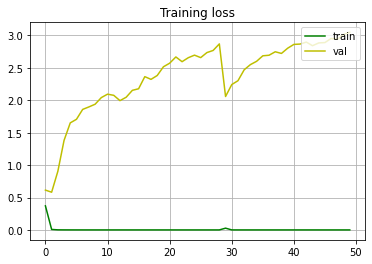

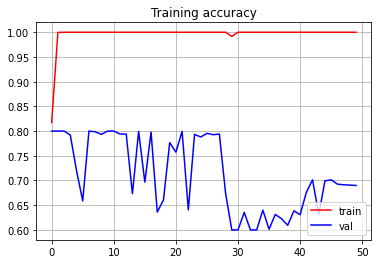

In [ ]:
plot_loss_accu(history) 